## Yield Curve Curvature Mean-Reverting Trading Strategy

### FINM 33150 Final Project

Hengxu Zhu, 12368409 | Yumeng Zhang, 12372205 | Siyang Qu, 12375854

In [1]:
import sys
sys.version

'3.10.8 (main, Nov 24 2022, 08:09:04) [Clang 14.0.6 ]'

In [2]:
from utils import *

## Motivating Idea

**Yield curve** is a graphical representation of the yields or interest rates of a series of fixed-income securities, such as bonds or treasury bills, with different maturities. The yield curve shows the relationship between the interest rates and the time to maturity for similar types of securities. In other words, it plots the yields of bonds with different maturities against each other. Normally, the yield curve is upward-sloping, which means that long-term bonds offer higher yields than short-term bonds. This is because long-term bonds carry a higher risk of inflation, interest rate changes, and default, and therefore require a higher yield to compensate investors for that risk. However, the shape of the yield curve can change depending on the prevailing economic conditions. For example, in times of economic uncertainty or recession, the yield curve can become inverted, which means that short-term bonds offer higher yields than long-term bonds. An inverted yield curve is often seen as a warning sign of an impending economic slowdown.

**The curvature of a yield curve** refers to the shape of the curve, which can be upward-sloping, flat, or inverted. It can provide insights into market expectations for future economic conditions and monetary policy. A steep upward-sloping curve can indicate expectations of strong economic growth and inflation, while a flat or inverted curve can indicate expectations of weaker growth or even a recession. The curvature of a yield curve can change over time as market conditions and expectations evolve. As a result, investors and analysts closely monitor the curvature of the yield curve as an important indicator of market conditions and sentiment.

Motivated from the spread trading strategy, our team expext the yield curve to mean-revert to an unconditional curve. Deviations in the curvature of the yield curve from historical norms are exploited to make bets on future prices. If the curvature is higher (lower) than the historical average, we bet that they’ll decrease (increase) towards the historical average. 


### Historical Evidence

Our motivation is also supported by the historical evidence that the US Treasury bonds are normally traded within tight and finite bounds. The reasons could include: 

1. Monetary policy: The Federal Reserve, the central bank of the United States, has the power to influence interest rates through its monetary policy decisions. When the Fed signals that it will keep interest rates low, it can put downward pressure on Treasury bond yields, which can cause them to trade within tight bounds.

2. Economic conditions: When the economy is growing at a steady pace and inflation is low, Treasury bond yields may trade within tight bounds because investors are less concerned about economic risks and are more willing to hold onto fixed-income investments like Treasuries.

3. Investor demand: US Treasury bonds are viewed as a safe haven investment, particularly in times of market stress. When investors become more risk-averse, they may flock to Treasury bonds, which can drive down yields and cause them to trade within tight bounds.

4. Technical factors: Technical factors such as supply and demand imbalances, trading volume, and market liquidity can also cause Treasury bond yields to trade within tight bounds.

Overall, Treasury bond yields can trade within tight bounds due to a combination of macroeconomic and technical factors.

### Theoretical Evidence

The yield curve is known to mean-revert because it reflects the market's expectations of future economic growth and inflation. When the economy is expected to grow strongly and inflation is expected to rise, long-term interest rates tend to be higher than short-term interest rates, resulting in a steep yield curve. Conversely, when the economy is expected to slow down and inflation is expected to decrease, long-term interest rates tend to be lower than short-term interest rates, resulting in a flat or inverted yield curve. As the research paper suggests, pure Expectation Hypothesis of the term structure suggests that the long-term interest rate is the average of the current and expected short-term rates, so that yield spread is mean-reverting [Fisher (1986), Lutz (1940), Meiselman (1962)].

As economic conditions change over time, market participants adjust their expectations about future growth and inflation, which in turn affects the shape of the yield curve. If expectations turn out to be overly optimistic or pessimistic, the yield curve may revert to its long-term average as market participants adjust their positions. This mean-reversion is driven by the tendency of market participants to correct for mispricing and to adjust their expectations as new information becomes available.



## Dataset

In these strategies, we are using US Treasuries yield curve rates as our dataset. The data is extracted from Quandl and the time span is from August 2001 to July 2022.

US Treasuries are often used in yield curve mean-reverting trading strategies because they are considered to be the benchmark for risk-free interest rates in the global financial markets. In addition, the US Treasury yield curve is closely watched by investors and economists as a barometer of economic growth and inflation expectations. As a result, changes in the shape of the yield curve can provide valuable information about the state of the economy and the future path of interest rates. US Treasuries are highly liquid, transparent, and have a wide range of maturities, which allows investors to take positions across the entire yield curve.

* **Yield Curve Rates**

In [3]:
df_yc_m = get_yield_curve()
df_yc_m.head()

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.64,3.91,4.46,4.72,4.85,5.47
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.86,3.22,3.93,4.37,4.60,5.45
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.44,2.87,3.66,4.03,4.30,5.05
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.84,3.30,4.08,4.55,4.78,5.54
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.07,3.59,4.38,4.84,5.07,5.74


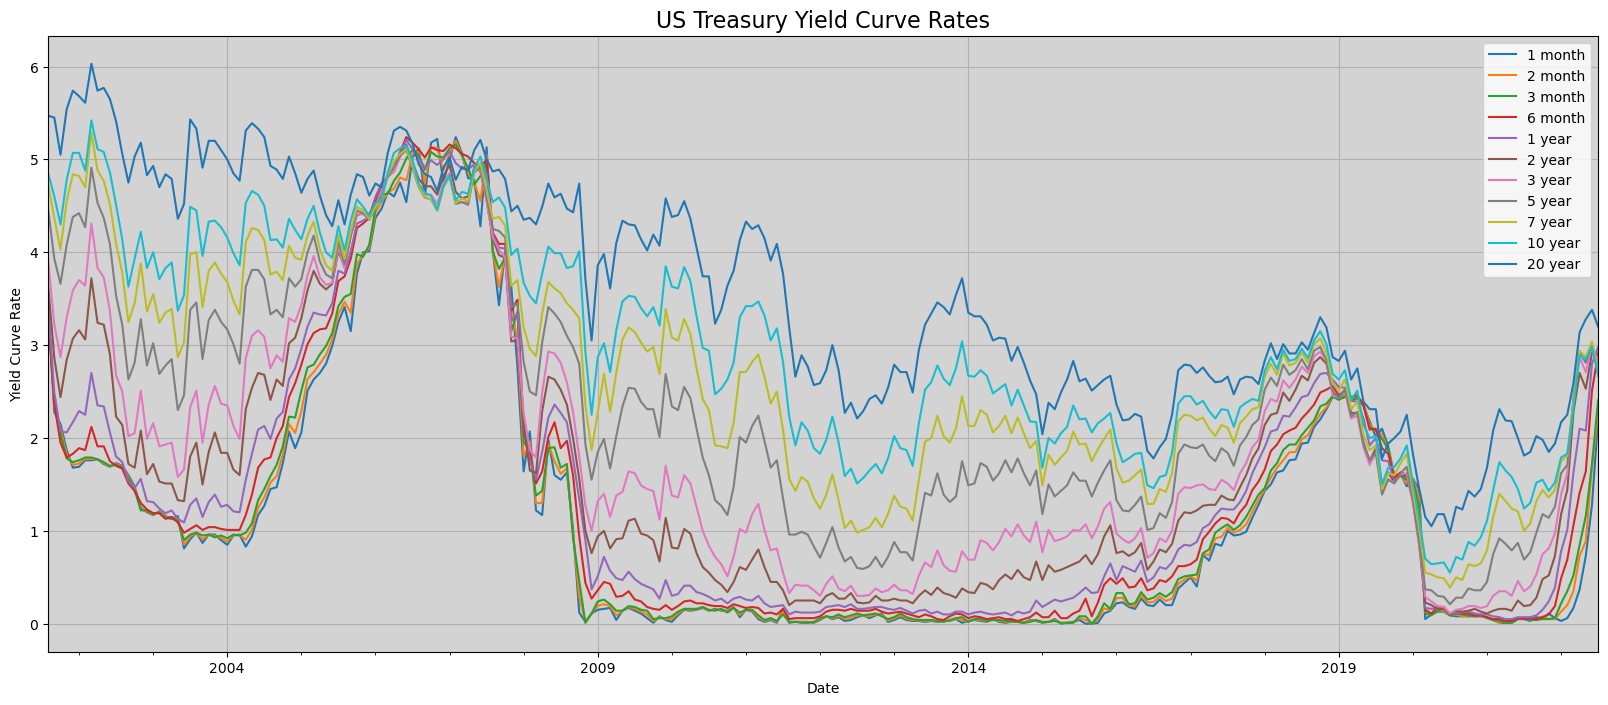

In [4]:
plot_yield_curve(df_yc_m)

* **Zero Coupon Rates**

From the carry trade strategy, we learnt that the spot rates are not directly applicable as discounting factors because they reflect the yields on coupon-bearing bonds. To **convert spot rates to zero coupon rates**, we needs to take into account the cash flows associated with coupon payments. Therefore, our team utilized the method introduced in class to do the **zero coupon rate** calculation and yield curve interpolation. 

Once the zero coupon rates are obtained, they can be used as discount factors for pricing financial instruments, which in our case, the US Treasury Bonds. 

In [5]:
df_zero = compute_zero_coupon(df_yc_m)
df_zero.head()

,1m_0,2m_0,3m_0,6m_0,1y_0,2y_0,3y_0,5y_0,7y_0,10y_0,20y_0
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.639807,3.909812,4.460031,4.720498,4.850970,5.512101
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.859924,3.219941,3.930495,4.371418,4.603021,5.515785
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.439957,2.869981,3.660632,4.031227,4.302993,5.101017
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.839964,3.299996,4.080791,4.551852,4.783659,5.602486
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.069962,3.590006,4.380931,4.842047,5.074012,5.799525


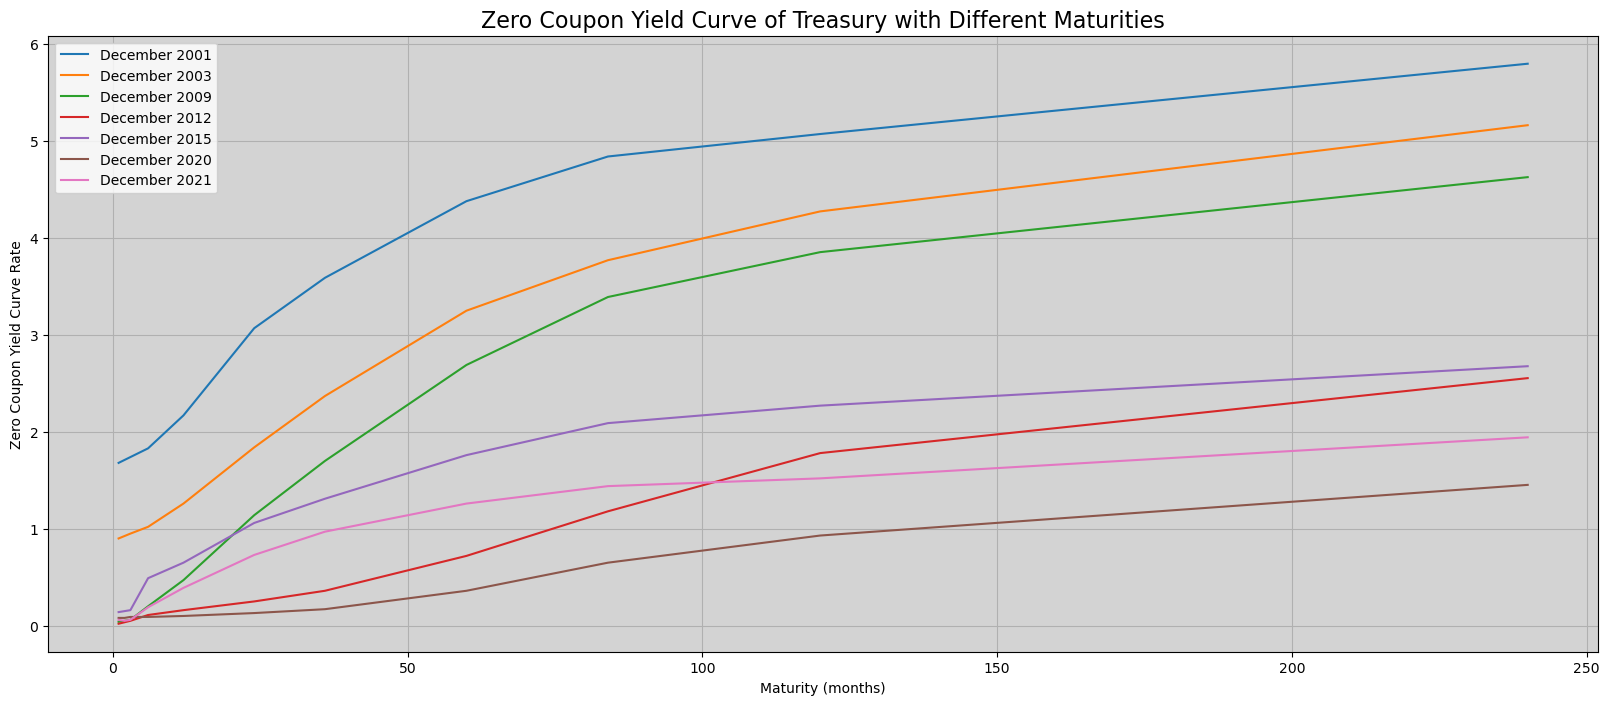

In [6]:
plot_zero_coupon_comparison(df_zero)

* **Bond Price**

We also calculated bond price as follows.

In [7]:
df_bond_price = calculate_bond_price(df_zero, df_yc_m,tenor=20)
df_bond_price.head()

,old_bond_price,new_bond_price
Date,,
2001-09-30,0.890777,0.838088
2001-10-31,0.833860,0.846026
2001-11-30,0.842052,0.845807
2001-12-31,0.841528,0.859484
2002-01-31,0.855059,0.869286


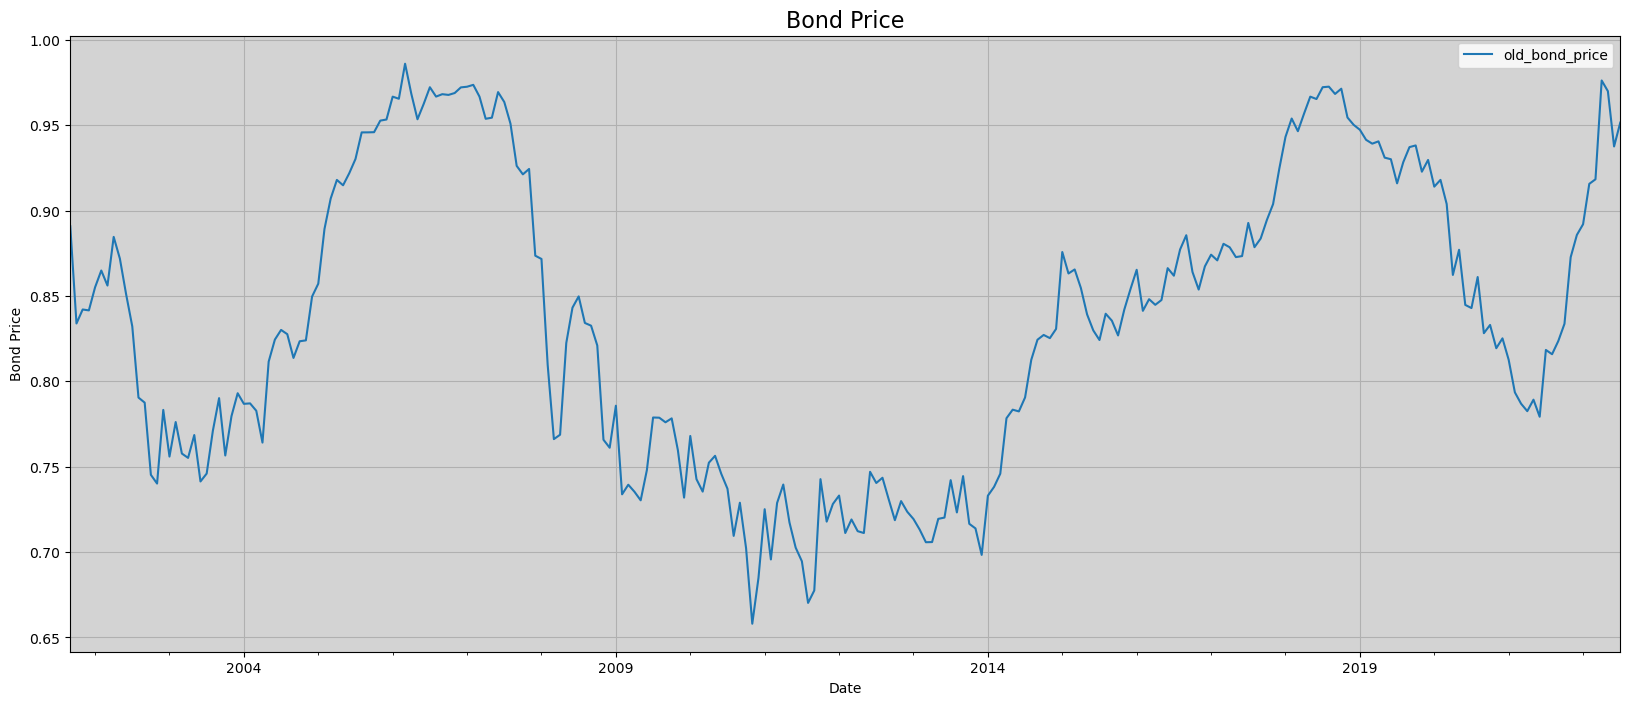

In [8]:
plot_bond_price(df_bond_price)

* **Fed Fund Rate**

We use the Fed Fund Rate as the borrowing cost if we would like to take action for one trading period. 

In [9]:
df_fed_fund_rate = get_fed_fund_rate()
df_fed_fund_rate.head()

,ffr
Date,
2001-08-31,0.008000
2001-09-30,0.007263
2001-10-31,0.007190
2001-11-30,0.006701
2001-12-31,0.006258


* **Forward Yield**

Referring to the academic paper, we assumed that the individual trading period is one month and that means we are holding each trade for a month. It would make more sense that we calculate the **one-month forward yield** to compare with the historical average or in specific, the unconditional curve. 

The unconditional curve will be explained and computed in the next section before clarifying our strategy. 

In [10]:
df_forward = compute_forward_yield(df_zero)
df_forward.head()

,1m_f,2m_f,3m_f,6m_f,1y_f,2y_f,3y_f,5y_f,7y_f,10y_f,20y_f
Date,,,,,,,,,,,
2001-08-31,3.40,3.37,3.355,3.292,3.410909,3.650233,3.924378,4.477998,4.736407,4.863163,5.520938
2001-09-30,2.28,2.40,2.460,2.376,2.509091,2.885138,3.246797,3.958469,4.396616,4.622543,5.529324
2001-10-31,2.15,2.05,2.000,1.910,2.062727,2.452563,2.890551,3.686235,4.053892,4.321086,5.113364
2001-11-30,1.87,1.78,1.735,1.774,2.077273,2.882137,3.340853,4.118263,4.584164,4.808143,5.618104
2001-12-31,1.68,1.74,1.770,1.860,2.214545,3.130395,3.644578,4.426709,4.880144,5.102533,5.816761


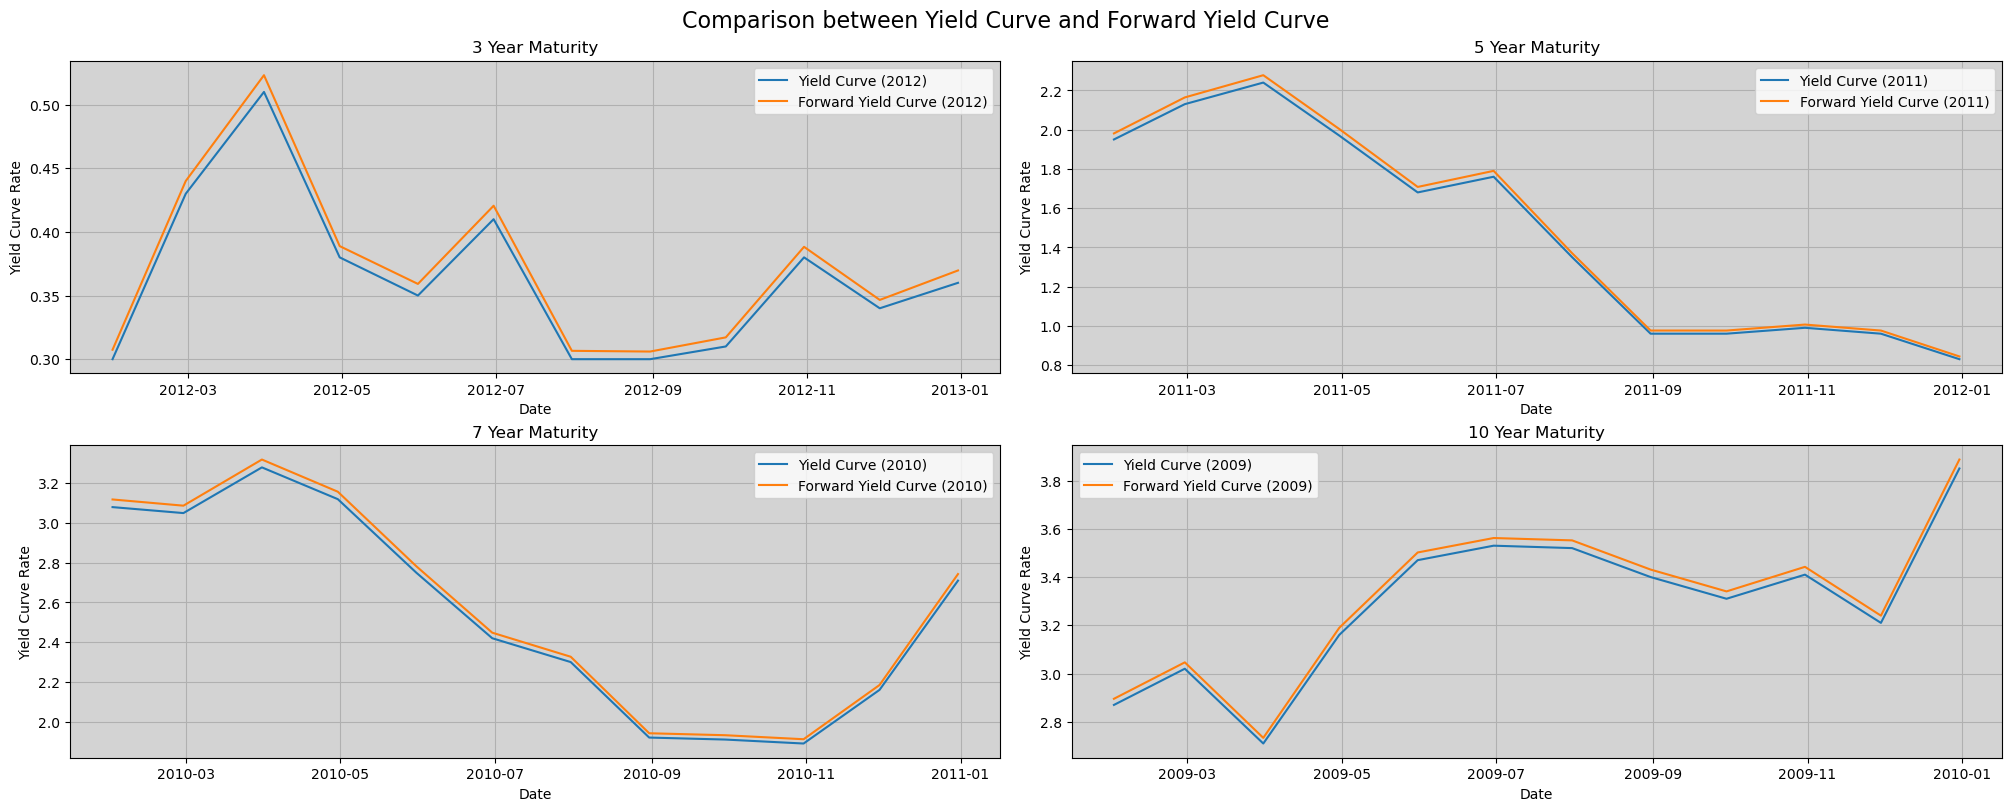

In [11]:
plot_forward_yield_comparison(df_yc_m,df_forward)

## Unconditional Yield Curve

The unconditional yield curve can be used as a benchmark for evaluating the current level of interest rates and for making investment decisions based on expected future changes in interest rates. It can also be used to compare different types of bonds and to assess the relative risks and rewards of different investment strategies.

The unconditional yield curve works as a trigger in our trading strategy. It determines the long-short action for each investment period. Three different methods, which are motivated from predictive homework, are used to calculate the unconditional curve so that we can compare to extract the best strategy.

* **Historical Average**: The simple arithmetic average of all historical yields. Using the historical average to calculate the unconditional yield curve helps to smooth out short-term fluctuations in interest rates that may not be representative of long-term trends. This can provide a more stable and reliable measure of interest rates over time, which can be useful for financial planning and risk management.

* **Historical Exponential Weighting Average**: Utilized Exponentially decaying method to calculate the average of all available historical yields. The exponentially decaying method is a popular approach for calculating the unconditional yield curve because it provides a flexible and adaptable way to capture the changing dynamics of interest rates over time. It could reflect the idea that recent data is more relevant.

* **Exponentially Weighted Moving Average with a Window**: The advantage of using the exponentially weighted moving average with a window is that it allows us to balance the need for accurate and up-to-date information with the need for a stable and reliable estimate of long-term trends. This can be useful for making informed investment decisions and for managing financial risk.

In [12]:
df_uncon_average = unconditional_average(df_zero)
df_uncon_exp_decay = unconditional_exponential_decay(df_zero, decay_coefficient = 0.1)
df_uncon_exp_decay_win = unconditional_exponential_decay(df_zero, decay_coefficient = 0.1, window = 20)

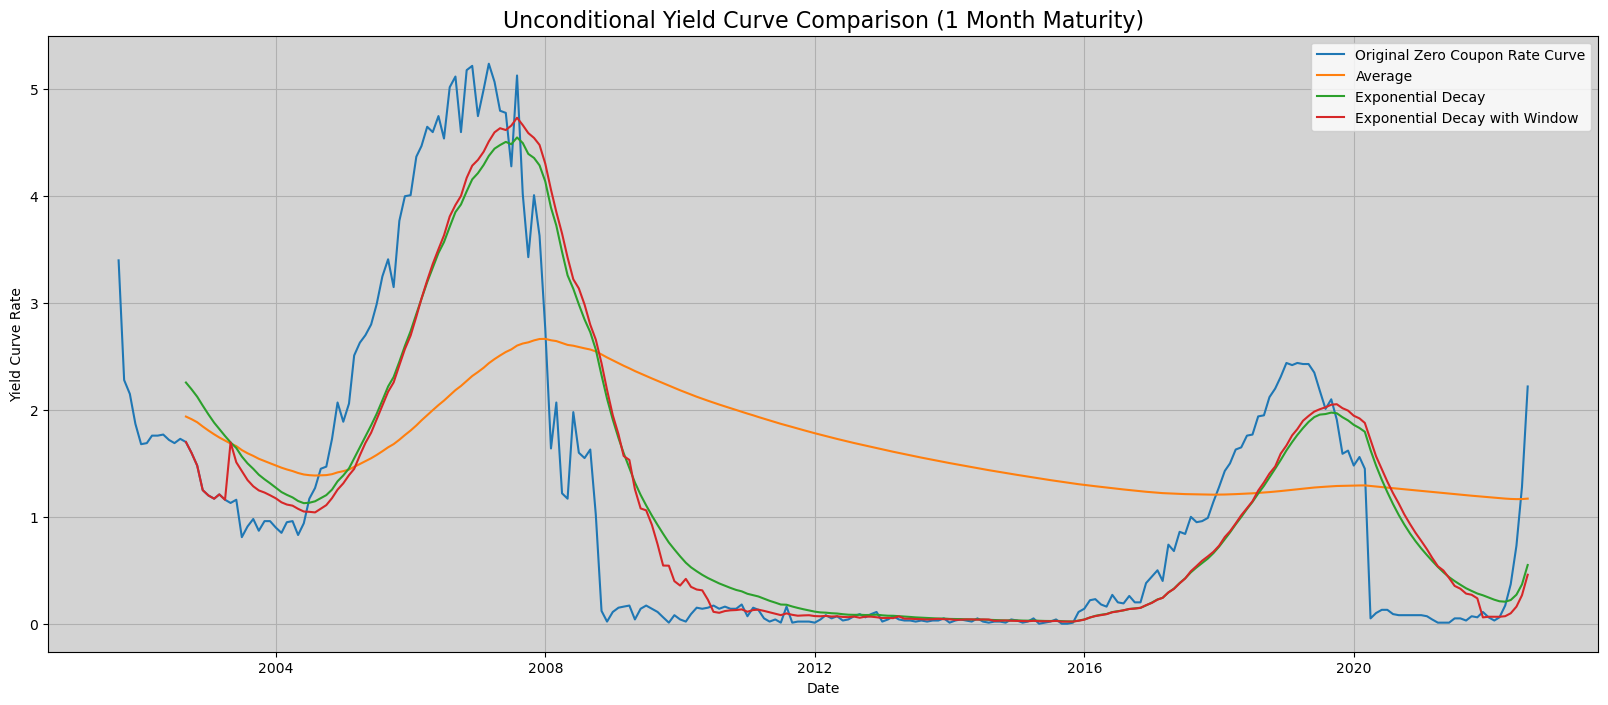

In [13]:
plot_unconditional_yc_comparision(df_zero, df_uncon_average, df_uncon_exp_decay, df_uncon_exp_decay_win, rate = 'z')

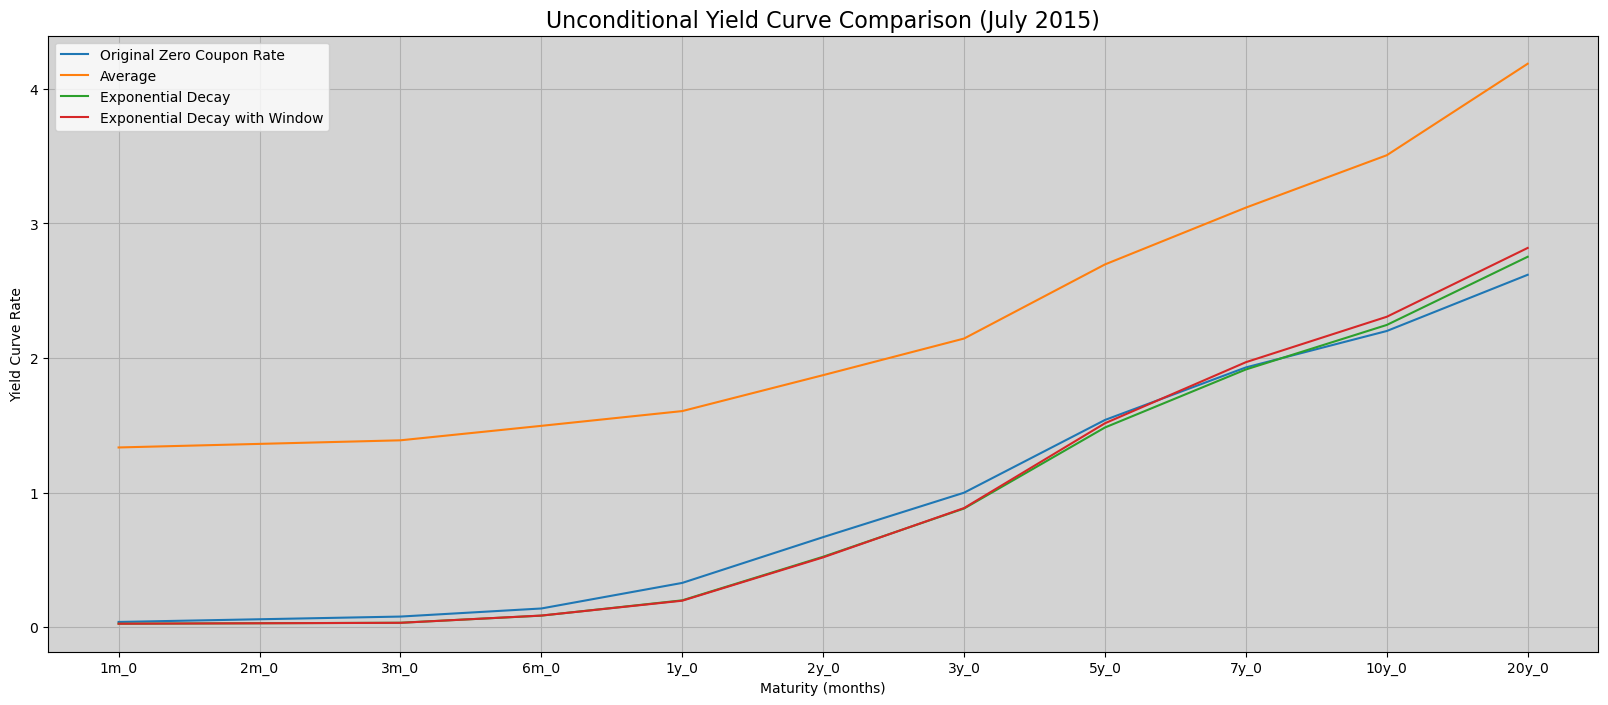

In [14]:
plot_unconditional_yc_comparision2(df_zero, df_uncon_average,df_uncon_exp_decay, df_uncon_exp_decay_win, rate = 'z')

While our team arranging the unconditional yield curve using the method from the research paper, we found that they are not always effective. For example, referring to the graph above, you may see that the simple historical average is apart from all other calculations. Actually, this is the reason we attempted three different methods to compute this curve to draw the best trading results.

## Strategy

**Barbell Strategy (Bets on the curvatures)**

- Invest in two ends of the yield and shorting the middle (or vice versa). 

- Curvature for the whole curve mean-reverts.

- Curvature for 3 adjacent bonds mean-reverts.

The overarching strategies allow us to identify deviations from expectation at any given point in time and construct long/short trades based on the mean-reversion assumption.

For example, if we observe that the curvature for three adjacent bonds mean-reverts to a level lower than that of the unconditional curve, we may decide to take a long position on the front and back bonds and a short position on the other bond. 

However, we recognize that these strategies can be further refined by incorporating other market indicators that can help us better predict whether deviations are likely to mean-revert with a high level of confidence. To do this, we may assign a confidence score to each trade based on factors such as market volatility or other relevant indicators. We don't make positions unless the curvature of that month is outside the bound. We then adjust the size of each trade based on this confidence score, taking into account our risk management objectives and overall portfolio strategy.

We define curvature as follows. Take three zero coupon bonds, with maturities of X, Y and Z months and corresponding zero coupon rates of rX , rY and rZ. The curvature of the yield curve, as defined by the three bonds, is the measure.

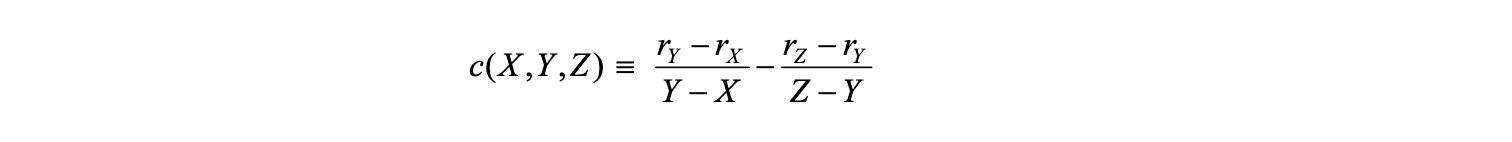

Take three bonds with maturity of three months, six months and one year, and set the confidence score as 0.4. The comparison of zero coupon rate curvature and unconditional yield curvature, along with the upper and lower bounds are as follows.

In [15]:
df_curvature = three_bond_curvature(df_zero, df_uncon_exp_decay, ['3m','6m','1y'], bound = 0.4, rate='z')
df_curvature.head()

,3m_0,6m_0,1y_0,origin_curvature,uncon_curvature,upper,lower
Date,,,,,,,
2002-08-31,1.69,1.67,1.74,-0.22,-0.333219,-0.255986,-0.410451
2002-09-30,1.57,1.51,1.53,-0.28,-0.328154,-0.250921,-0.405387
2002-10-31,1.44,1.43,1.46,-0.10,-0.305755,-0.228523,-0.382988
2002-11-30,1.22,1.30,1.56,-0.20,-0.295691,-0.218459,-0.372924
2002-12-31,1.22,1.23,1.32,-0.14,-0.280407,-0.203174,-0.357639


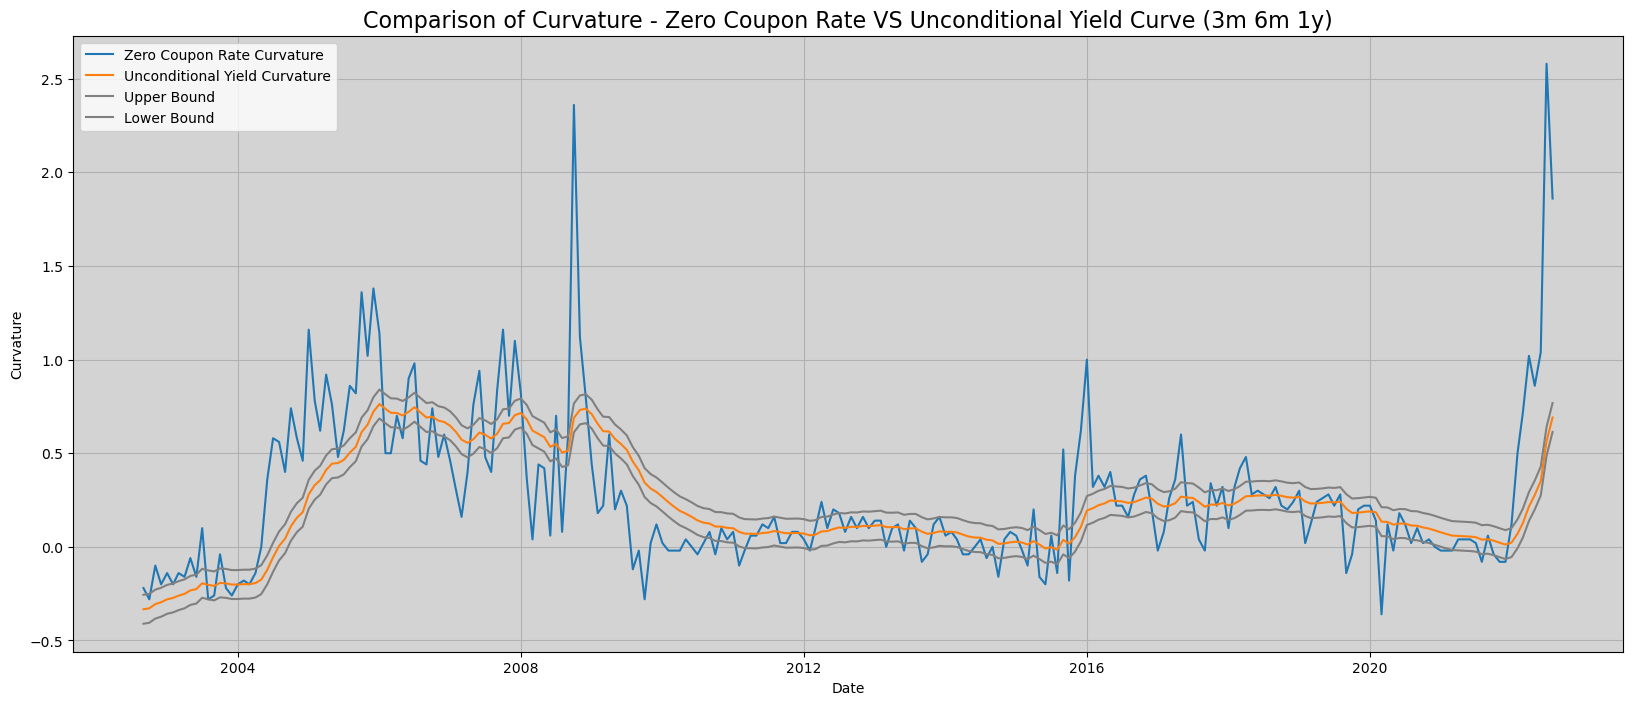

In [16]:
plot_curvature(df_curvature, '3m 6m 1y',rate='z',bound=True)

## Trading Process 

The trading process and strategy implementation involves the following steps: 

1. Based on the curvature comparison, we determine the long-short positions of each bonds. This process is done by comparing the curvature in month n and take actions to buy or short over the next month. 

    For example, if the curvature is larger than the historical average one 2019-10-31, then we anticipate that the middle bond is going to increase in price and the bonds on two ends will decrease, so we buy the middle one can short the other two starting 2019-11-01 and hold it until the month end. 

2. The capital is determined as 200. You may change this to other values such as 2MM, but it will not change the return. For each month, we will take a leverage as we have done in the FX Carry Trade when we are short in money. For each month, we will buy or short an amount of 1000 of each bond. 

    There will be two scenarios of trading: based on step 1, if we short middle and buy the two ends, we will need an extra 800 and therefore we have a borrowing cost for these 800. The borrowing cost is calculated using the Fed Fund Rate + 50 basis. On the other hand, if we have buy the middle and short the two ends, we have an extra 1000 and our own capital, we will invest these money (1200) in the bank. For all other cases, we just invest these 200 in the bank. 

The following are the cumulative pnl plots obtained under yield curve curvature mean-reverting trading strategy by choosing a portfolio of three bonds with different maturity and confidence score.

### 1 year + 5 year + 20 year

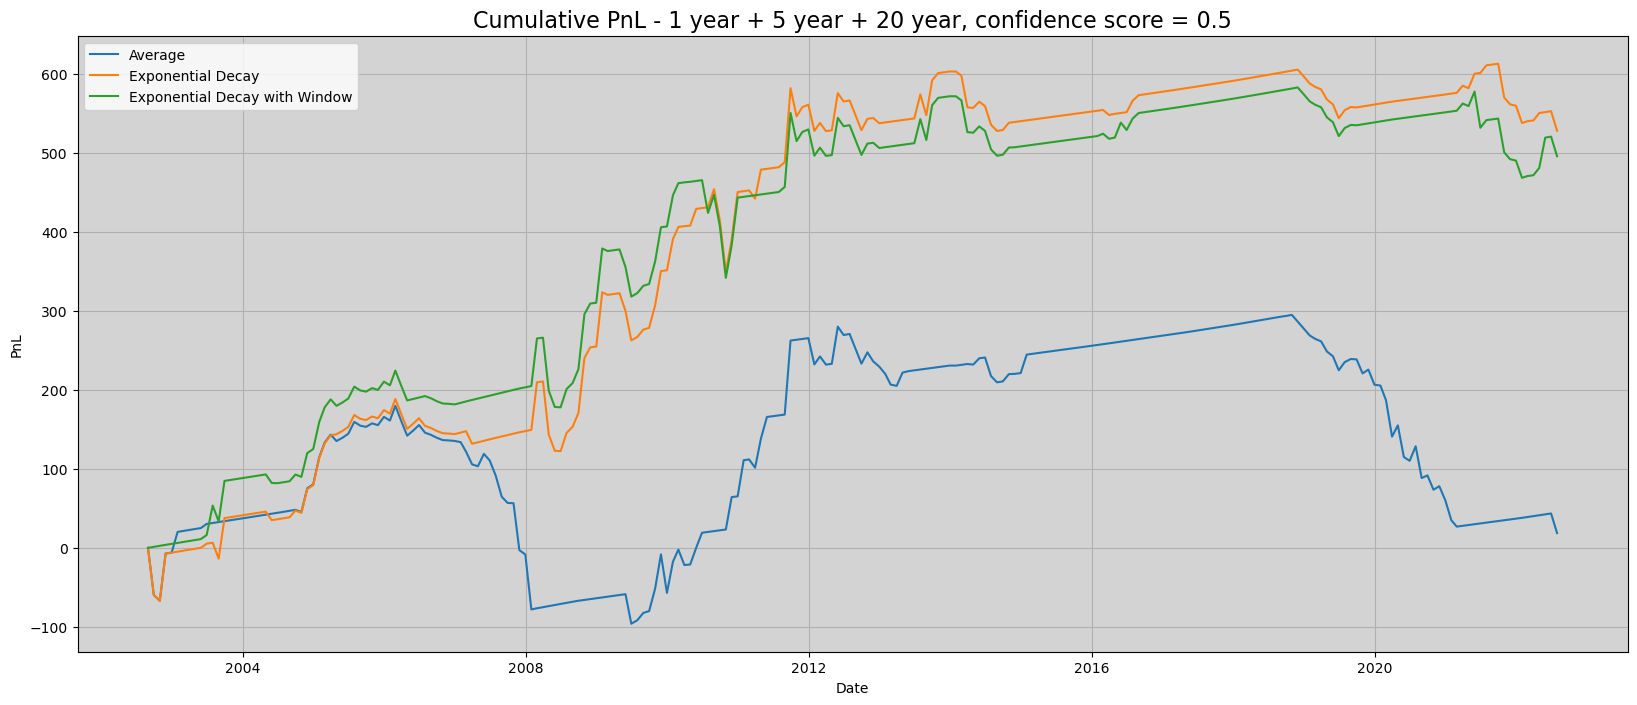

In [25]:
combination1 = ['1y','5y','20y']
bound1 = 0.5

df1_ave = trade(df_zero, df_uncon_average, df_yc_m, df_fed_fund_rate, combination1, bound = bound1)
df1_exp = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination1, bound = bound1)
df1_expwin = trade(df_zero, df_uncon_exp_decay_win, df_yc_m, df_fed_fund_rate, combination1, bound = bound1)

plot_cumulative_pnl(df1_ave, df1_exp, df1_expwin, '1 year + 5 year + 20 year, confidence score = 0.5')

### 1 year + 2 year + 3 year

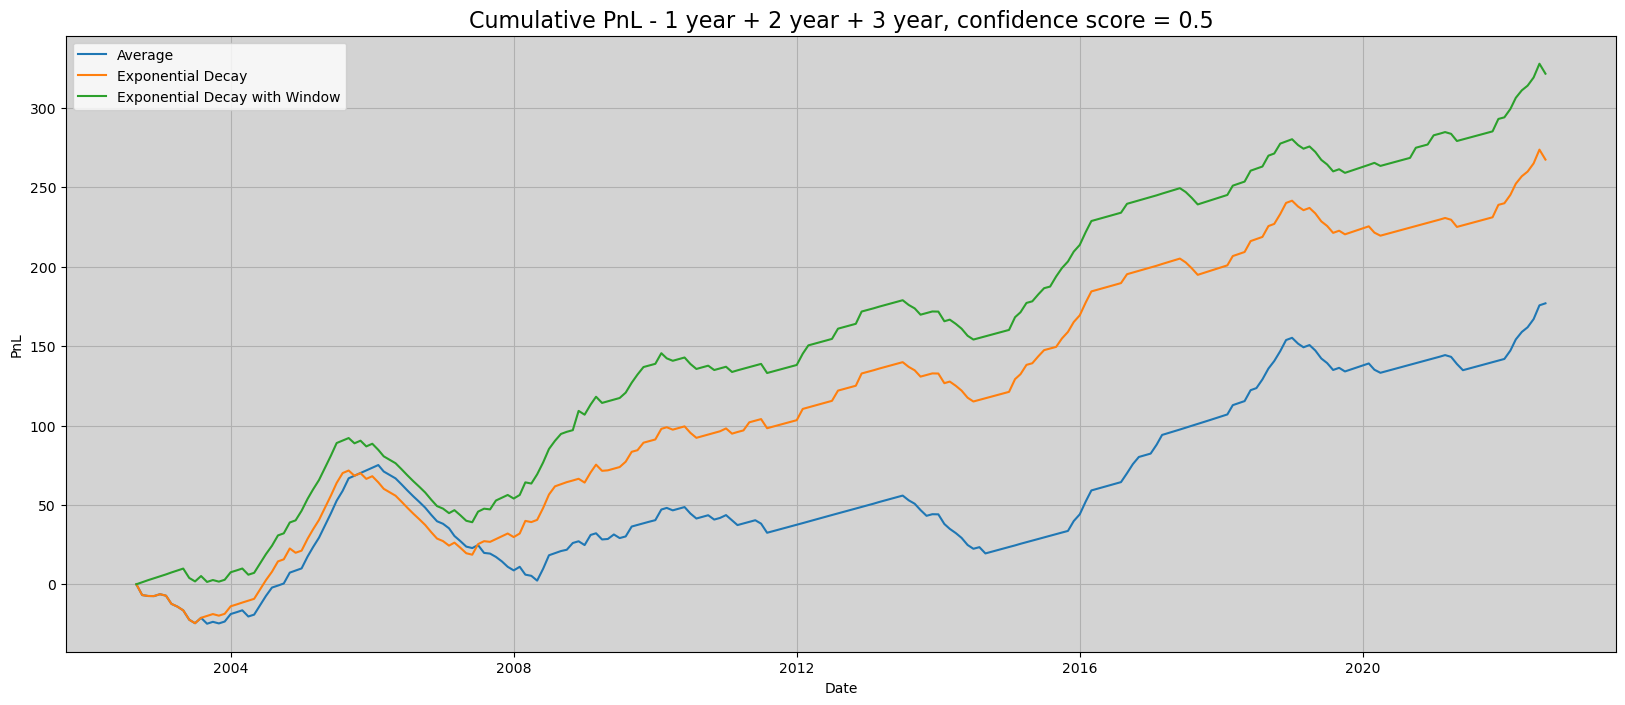

In [18]:
combination2 = ['1y','2y','3y']
bound2 = 0.5

df2_ave = trade(df_zero, df_uncon_average, df_yc_m, df_fed_fund_rate, combination2, bound = bound2)
df2_exp = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination2, bound = bound2)
df2_expwin = trade(df_zero, df_uncon_exp_decay_win, df_yc_m, df_fed_fund_rate, combination2, bound = bound2)

plot_cumulative_pnl(df2_ave, df2_exp, df2_expwin, '1 year + 2 year + 3 year, confidence score = 0.5')

### 5 year + 10 year + 20 year

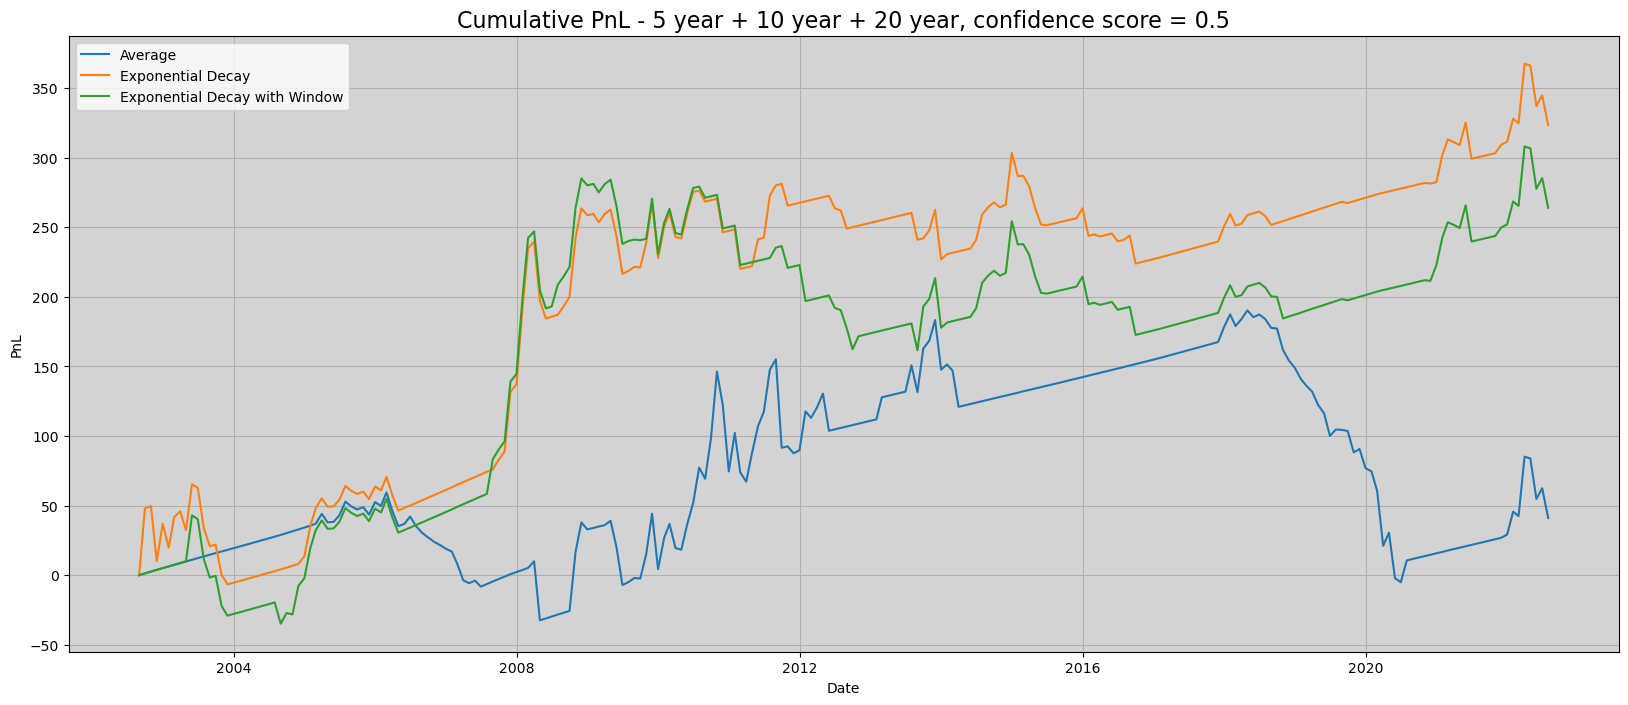

In [19]:
combination3 = ['5y','10y','20y']
bound3 = 0.5

df3_ave = trade(df_zero, df_uncon_average, df_yc_m, df_fed_fund_rate, combination3, bound = bound3)
df3_exp = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination3, bound = bound3)
df3_expwin = trade(df_zero, df_uncon_exp_decay_win, df_yc_m, df_fed_fund_rate, combination3, bound = bound3)

plot_cumulative_pnl(df3_ave, df3_exp, df3_expwin, '5 year + 10 year + 20 year, confidence score = 0.5')

## Analysis

### 1 year + 5 year + 20 year

In [20]:
result1_ave = performance_metrics(df1_ave,'Average')
result1_exp = performance_metrics(df1_exp,'Exponential Decay')
result1_expwin = performance_metrics(df1_expwin,'Exponential Decay with Window')

pd.concat([result1_ave, result1_exp, result1_expwin])

,Mean,Vol,Sharpe,Min,Max,Max Drawdown
Average,0.004680,0.282338,0.016628,-0.348042,0.46902,-1.749428
Exponential Decay,0.132108,0.315133,0.419156,-0.336566,0.46902,-3.341598
Exponential Decay with Window,0.124044,0.310761,0.399065,-0.336566,0.46902,-3.855302


Based on the above metrics, we can see that the exponential decay works best as the historical average to help us get the best returns. The return is quiet good with an annualized 13.21%. This also gives us the best Sharpe Ratio. If we ultilize this combination to implement our trading strategy, we should use Exponential Decay as the historical average. 

If we want to analyze the reason for this method to work the best, the main reason is the combination that we have. Since we have a combination of short, mid and long term bonds, the exponential decay calculate the best weighted average to weight each one of these bond. This will make more sense as we move on the analyze the best models for other combinations. 

### 1 year + 2 year + 3 year

In [21]:
result2_ave = performance_metrics(df2_ave,'Average')
result2_exp = performance_metrics(df2_exp,'Exponential Decay')
result2_expwin = performance_metrics(df2_expwin,'Exponential Decay with Window')

pd.concat([result2_ave, result2_exp, result2_expwin])

,Mean,Vol,Sharpe,Min,Max,Max Drawdown
Average,0.044244,0.056427,0.783926,-0.033929,0.043308,-0.443615
Exponential Decay,0.066876,0.057999,1.152853,-0.033929,0.043308,-0.342699
Exponential Decay with Window,0.080400,0.059402,1.353425,-0.031367,0.060776,-0.398840


Based on the above metrics, we can see that the exponential decay with a short term window works best as the historical average to help us get the best returns. The return is quiet good with an annualized 8.04%. This also gives us the best Sharpe Ratio, but he best Max Drawdown is given by pure exponential decay. If we ultilize this combination to implement our trading strategy, we should use Exponential Decay with Window as the historical average. 

In this combination, we only have short term bonds. Since the short term bonds are highly influenced by the recent market conditions, we would anticipate the the most recent average of the calculation to give the best result. In addition, comparing the the previous combination, the arithmetic average of the entire history in this combination works extremely bad. This is also consistent with the characteristics of the short term bonds as it does not make sense for us to give to much weight for the old history in our calculation. 

### 5 year + 10 year + 20 year

In [22]:
result3_ave = performance_metrics(df3_ave,'Average')
result3_exp = performance_metrics(df3_exp,'Exponential Decay')
result3_expwin = performance_metrics(df3_expwin,'Exponential Decay with Window')

pd.concat([result3_ave, result3_exp, result3_expwin])

,Mean,Vol,Sharpe,Min,Max,Max Drawdown
Average,0.010272,0.221664,0.046419,-0.317726,0.239876,-1.126555
Exponential Decay,0.080844,0.223594,0.361652,-0.212026,0.272797,-1.039839
Exponential Decay with Window,0.065988,0.214632,0.307266,-0.212026,0.272797,-1.797838


For this long term bonds combination, on the other hand, the exponential decay gives the best result. We have a return of 8.08% and it also has the lowest Max Drawdown in this case. 

### Influence of confidence score

To find out whether choosing different confidence scores would have influence on the performance, we choose the combination of bonds with maturity of one year, two years and three years, set different bounds and compare the results.

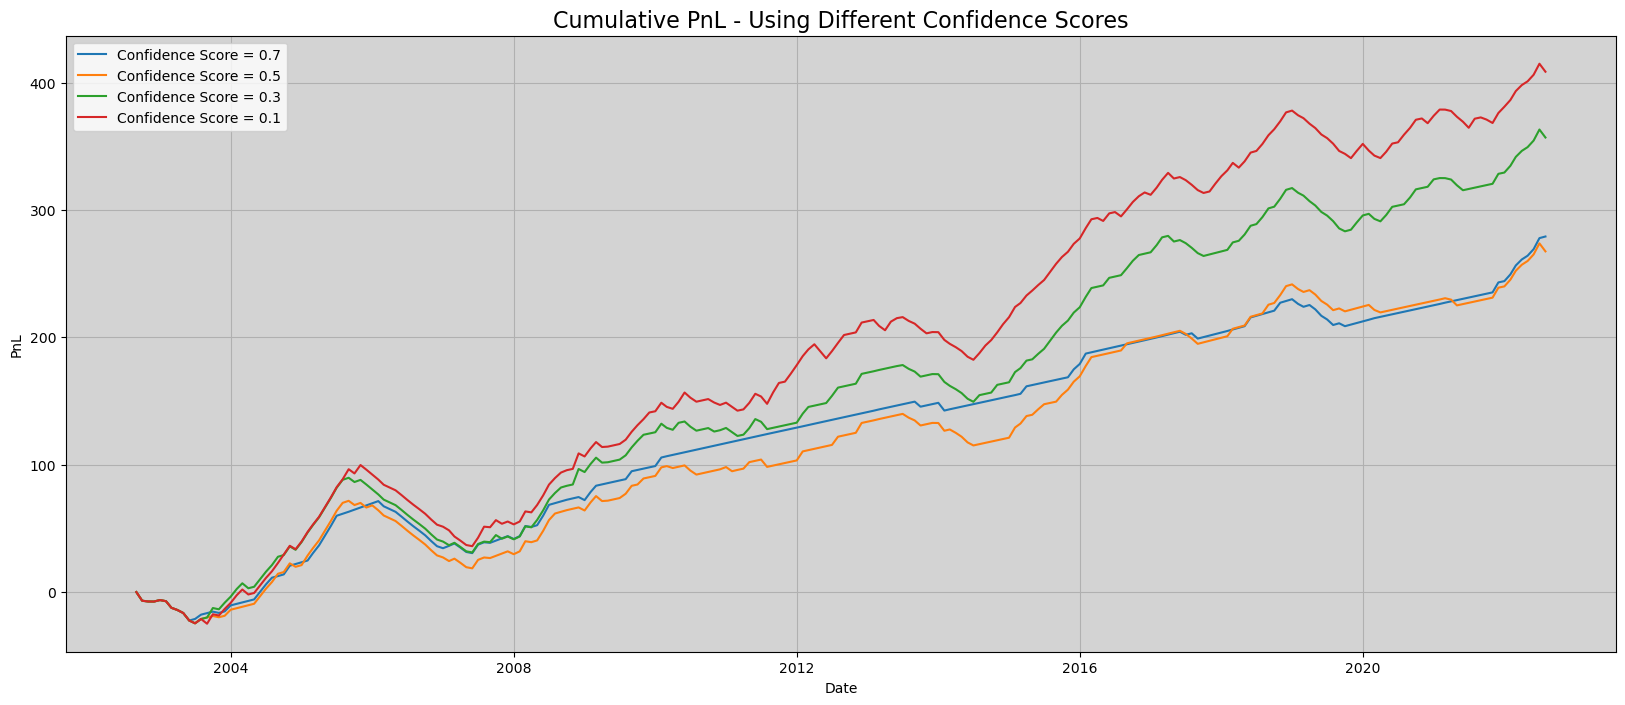

In [23]:
combination2 = ['1y','2y','3y']
bound21 = 0.7
bound22 = 0.5
bound23 = 0.3
bound24 = 0.1

df21 = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination2, bound = bound21)
df22 = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination2, bound = bound22)
df23 = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination2, bound = bound23)
df24 = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination2, bound = bound24)

plot_cumulative_pnl2(df21, df22, df23, df24)

In [24]:
result21 = performance_metrics(df21,'Confidence Score = 0.7')
result22 = performance_metrics(df22,'Confidence Score = 0.5')
result23 = performance_metrics(df23,'Confidence Score = 0.3')
result24 = performance_metrics(df24,'Confidence Score = 0.1')

pd.concat([result21, result22, result23, result24])

,Mean,Vol,Sharpe,Min,Max,Max Drawdown
Confidence Score = 0.7,0.069792,0.045962,1.518662,-0.033929,0.043308,-0.314243
Confidence Score = 0.5,0.066876,0.057999,1.152853,-0.033929,0.043308,-0.342699
Confidence Score = 0.3,0.089220,0.068305,1.306313,-0.033929,0.060776,-0.737603
Confidence Score = 0.1,0.102144,0.077807,1.312548,-0.033929,0.060776,-1.081317


According to the above results, we could see that as confidence score gets larger, the cumulative pnl gets smaller, however, the Sharpe ratio is the best when we set confidence score to be 0.7, which suggests that setting confidence score could successfully reduce risk and increase stability.

Overall speaking, the combination of short, middle and long term bonds give the best returns. However, it does not give the best Sharpe Ratio due to the high volatility. Meanwhile, the short term combination gives a decent return of 8% and also an empressive Sharpe of 1.35. If I am the one who would try this investment strategy, I would try the combination of the short term as it can take the best advantage of the bonds volatilities and mean reverting strategy will generate the best result for us. 

## Conclusion

After evaluating the strategy, we found that this strategy can generate a steady return for us to be beneficiary relative to just investing into bonds without active management. In addition, this would works better if we focus on short term bonds. This strategy is not only worth trying for investment corporation, but also can be done by individual investors as is does not require massive capital to take initiatives. 

However, this may not be the case as this is just a very basic capital choice. To create more specific and reliable trading strategy, one may need to do more analysis on the max drawdown and other conditions such as running out of the capital as in reality, we don't have the chance to make large mistakes and still have enough capital to continue the trade. 

### Market Condition

From the analysis and PnL graph, we noticed that the strategy has some drawdown and did not generate effective PnL since 2020. This is due to the Covid pandemic. Also, from the large Fixed Income Buy Side (PIMCO), the bond market has been underperforming over the last one to two years and the market is reopening as the Fed increases the rate Therefore, the bond market has high volatility nowadays. Although it means there are more returns and profits, it also means one needs to be extremely careful when dealing with the the uncertainties in the market. 

### Limitations

For a yield curve mean reverting strategy, there are many potential risks and limitations. For example, the yield curve may not always be a reliable predictor of future economic conditions, and changes in the yield curve may not always be driven by fundamental factors. This could also be seen from the difference in different combinations of yields. Additionally, the strategy may be affected by transaction costs and may require a significant amount of capital to implement effectively. Although we assumed a 50 basis point, this may not represent all the uncertain costs in the real world market. 

In conclusion, the yield curve mean reverting strategy can be a useful tool for investors who are looking to diversify their portfolio and take advantage of short-term market inefficiencies. However, it should be used in conjunction with other investment strategies and should be approached with caution, taking into account individual risk tolerance and investment goals.